In [189]:
import pandas as pd
import numpy as np
import matplotlib 
import matplotlib.pyplot as plt
import datetime
import psutil
import math
import seaborn as sns
from datetime import timedelta, datetime, tzinfo, timezone, time
from PIL import Image, ImageDraw
from numpy import asarray
from math import atan2,degrees,radians

In [190]:
def show_data():
    train_folder = [7554]#,7556,7557,7558,7559,7560,7561,7563,7569,7570,7571,7572,7573,7574]
    for j in train_folder:
        for i in range(1,22):
            url = r"train/"+str(j)+"/SimpleTest/"+str(i)+".csv"
            data = pd.read_csv(url)
            data.columns = data.columns.str.replace(' ', '')
            submit_time = data.iloc[-1][0]
            start_time = data.iloc[-2][0]
            data.dropna(inplace=True)
            data['X'] = data.X.astype(float)
            data.Time = data.Time.str.replace("00:","").astype(np.float64)
            
            fig=plt.figure(figsize=(20,5))

            ax= fig.add_subplot(1, 2, 1)
            ax.plot(data.Pressure,"#FF8000")
            ax.set_title("Pressure",fontdict={'fontsize': 20})

            ax2 = fig.add_subplot(1, 2, 2)
            ax2.plot(data.Time,c='b')
            ax2.set_title("Time",fontdict={'fontsize': 20})

            plt.show()
            hand_lifts = 0
            rolling_std = data.Time.rolling(window=20).std()

            for i in range(len(data.Time)-1):
                if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
                    hand_lifts +=1

            print("Number of hand lifts: " + str(hand_lifts))

>  Notice that file number 22 does not exist (there is only an empty image), we will ignore this file.

In [576]:
data = pd.read_csv(r'train/7554/SimpleTest/6.csv')

In [577]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1111 entries, 0 to 1110
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   X          1111 non-null   object 
 1    Y         1109 non-null   float64
 2    Pressure  1109 non-null   float64
 3    TiltX     1109 non-null   float64
 4    TiltY     1109 non-null   float64
 5    Time      1109 non-null   object 
dtypes: float64(4), object(2)
memory usage: 52.2+ KB


In [578]:
#remove the extra spaces in the columns.
print(data.columns)
data.columns = data.columns.str.replace(' ', '')
data.head(3)

Index(['X', ' Y', ' Pressure', ' TiltX', ' TiltY', ' Time'], dtype='object')


,X,Y,Pressure,TiltX,TiltY,Time
0,758.016399122301,569.381222,0.088853,-4282.0,2245.0,00:02.7042668
1,758.069061092505,569.170574,0.108629,-4282.0,2245.0,00:02.7198912
2,758.069061092505,569.170574,0.141833,-4011.0,2058.0,00:02.7355150


In [579]:
submit_time = data.iloc[-1][0]
start_time = data.iloc[-2][0]
data.dropna(inplace=True)
print(start_time)
print(submit_time)

total_time = float(submit_time[37:]) - float(start_time[38:])
print("Total time drawing: 00:" +str(total_time))

Time Elapsed till drawing started: 00:02.7042668
Time Elapsed till drawing submit: 00:16.8506948
Total time drawing: 00:14.146428


In [580]:
data['X'] = data.X.astype(float)

In [581]:
# change the Time column to float
data.Time = data.Time.str.replace("00:","").astype(np.float64)

```python
data.Time = data.Time.apply(lambda x: datetime.strptime(x[:-1],"%M:%S.%f"))
```

In [582]:
data.head(3)

,X,Y,Pressure,TiltX,TiltY,Time
0,758.016399,569.381222,0.088853,-4282.0,2245.0,2.704267
1,758.069061,569.170574,0.108629,-4282.0,2245.0,2.719891
2,758.069061,569.170574,0.141833,-4011.0,2058.0,2.735515


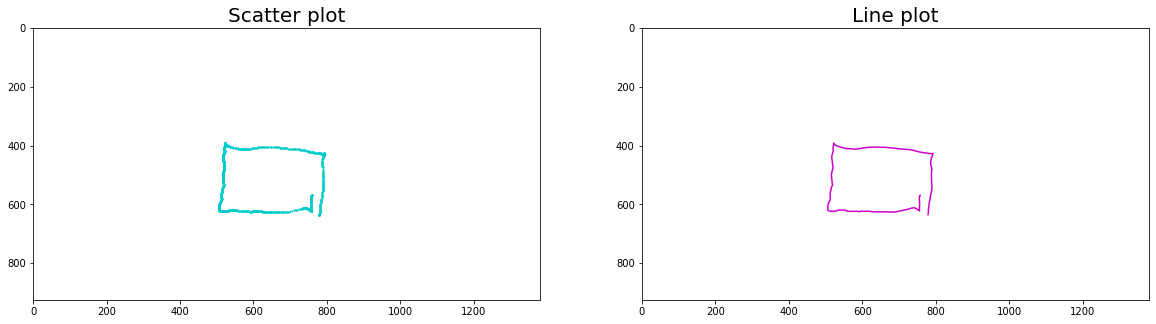

In [583]:
fig=plt.figure(figsize=(20,5))
ax= fig.add_subplot(1, 2, 1)

plt.gca().invert_yaxis()
ax.scatter(data.X,data.Y,s=1,c='#00CCCC')
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
ax.set_title("Scatter plot",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
plt.gca().invert_yaxis()
ax2.plot(data.X,data.Y,"#CC00CC")
ax2.set_xbound(lower=0.0, upper=1381)
ax2.set_ybound(lower=0.0, upper=925)
ax2.set_title("Line plot",fontdict={'fontsize': 20})

plt.show()

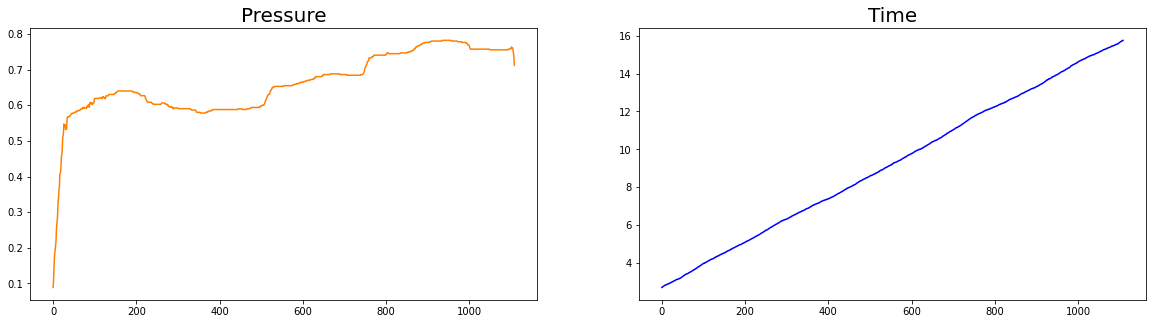

In [584]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.Pressure,"#FF8000")
ax.set_title("Pressure",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.Time,c='b')
ax2.set_title("Time",fontdict={'fontsize': 20})

plt.show()

## *Hand lifts:*

In [585]:
hand_lifts = 0
rolling_std = data.Time.rolling(window=14).std()

for i in range(len(data.Time)-1):
    if (data.Time[i+1] > data.Time[i] + rolling_std[i]):
        hand_lifts +=1
        
print("Number of hand lifts: " + str(hand_lifts))

Number of hand lifts: 0


## *Number of lines:*

In [595]:
def find_slope(X2,X1,Y2,Y1):
    slope = (float)(Y2-Y1)/(X2-X1)
    return slope

In [626]:
slopes = [] 
jump = 20
for i in range(0,len(data.X)-20,40):
    if(data.X[i+jump] - data.X[i]) == 0:
        continue
    else:
        slopes.append(find_slope(data.X[i+jump], data.X[i], data.Y[i+jump],data.Y[i]))       
slopes = pd.Series(slopes)

#fig = plt.figure(figsize=(10, 4))
#plt.plot(slopes,"r")

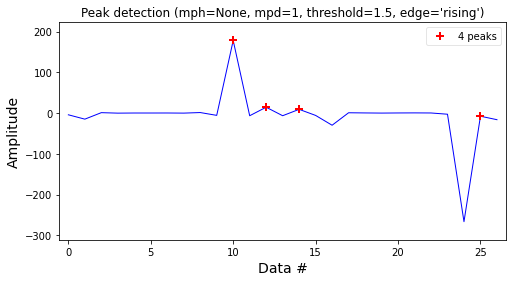

[10 12 14 25]


In [632]:
from detecta import detect_peaks

index = detect_peaks(slopes,show=True,threshold=1.5)
print(index)

In [633]:
res = 0
for idx in range(1, len(slopes) - 1):
    if slopes[idx + 1] > slopes[idx] < slopes[idx - 1] or slopes[idx + 1] < slopes[idx] > slopes[idx - 1]:
        res += 1
        
#printing result
print("Peaks and Valleys count : " + str(res))

Peaks and Valleys count : 20


In [634]:
numOfLines = 0
roll_std = slopes.rolling(window = 5).std()

for i in range(0,len(slopes)-1):
    if (abs(slopes[i+1] - slopes[i]) < 1) :
        continue
    elif (slopes [i+1] - roll_std[i] > slopes[i]) or (slopes[i] - roll_std[i] > slopes[i+1]):
        numOfLines = numOfLines + 1
        
if numOfLines == 0:
    numOfLines += 1    
#else: numOfLines /=2

print("Number of lines: " + str(numOfLines))

Number of lines: 9


In [635]:
def calculateAngle(X1,X0,Y1,Y0):
    deltaX = (X1 - X0)
    deltaY = (Y1 - Y0)
    angle = (math.atan2(deltaY,deltaX))*(180/math.pi)
    if angle < 0:
        angle = 360 + angle
    return angle

In [636]:
angels = []
jump = int((len(data))/10)
for i in range(0,len(data.X)-jump):
    angels.append(int(calculateAngle(data.X[i+jump],data.X[i],data.Y[i+jump],data.Y[i])))
angels = pd.Series(angels)

#fig = plt.figure(figsize=(10, 4))
#plt.plot(angels,"r")

In [637]:
numOfLines = 0
roll_std = angels.rolling(window = 28).std()

for i in range(0,len(angels)-1):
    if (abs(angels[i+1] - angels[i]) < 1) :
        continue
    elif (angels [i+1] - 5 > angels[i]) or (angels[i] - 5 > angels[i+1]):
        numOfLines = numOfLines + 1
        
if numOfLines == 0:
    numOfLines += 1    
#else: numOfLines /=2

print("Number of lines: " + str(numOfLines))

Number of lines: 5


### *Length of the lines:*

In [13]:
def Line_len(X1,Y1,X2,Y2):
    len = math.sqrt((X2-X1)**2 + (Y2-Y1)**2)
    return len

## *Open or closed shape:*
Only relevant for some of the drawings.

(3,4,8,11,13,16,17,19,20,21)

In [86]:
img = Image.open(r'train/7554/SimpleTest/3.PNG')
img = img.convert("RGB")
img = img.crop((0,220,1360,885))

In [87]:
target_pixel = (0,0)
target_color = (255,255,0)
ImageDraw.floodfill(img,target_pixel,target_color)#,thresh=0.5
im = asarray(img)

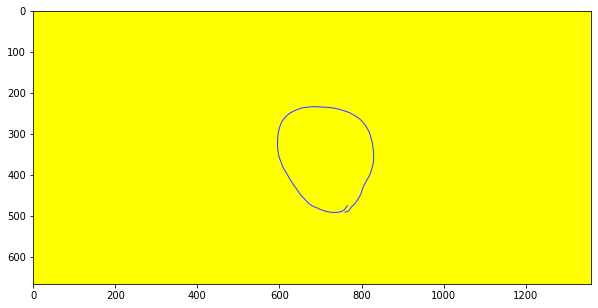

In [88]:
fig = plt.figure(figsize=(10, 7))  
plt.imshow(img)

In [89]:
count =0 
for i in range(im.shape[0]):
    for j in range(im.shape[1]):
            #for q in range(3):
        if ((im[i][j] == [255,255,255]).all() == True):
            count+=1
if count == 0:
    print ("Open Shape")
else: 
    print ("Close Shape")

Open Shape


<IPython.core.display.Javascript object>


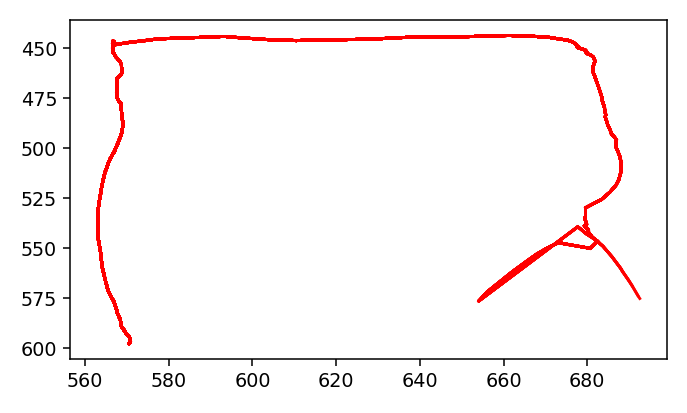

In [133]:
#import psutil
%matplotlib notebook

#plt.rcParams['animation.html'] = 'jshtml'

fig = plt.figure(figsize=(5,3),dpi=100)
ax = fig.add_subplot(111)
plt.gca().invert_yaxis()
ax.set_xbound(lower=0.0, upper=1381)
ax.set_ybound(lower=0.0, upper=925)
plt.tight_layout()
plt.show()


In [134]:
c=[]
d=[]
for i in range (len(data.X)):
    c.append(data.X[i])
    d.append(data.Y[i])
    plt.tight_layout()
    ax.plot(c,d , color='r')
    fig.canvas.draw() 
plt.close()


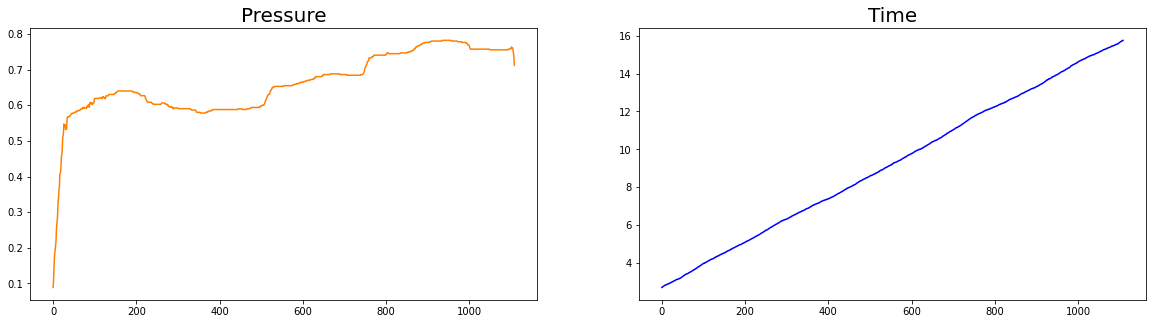

In [79]:
fig=plt.figure(figsize=(20,5))

ax= fig.add_subplot(1, 2, 1)
ax.plot(data.Pressure,"#FF8000")
ax.set_title("Pressure",fontdict={'fontsize': 20})

ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(data.Time,c='b')
ax2.set_title("Time",fontdict={'fontsize': 20})

plt.show()

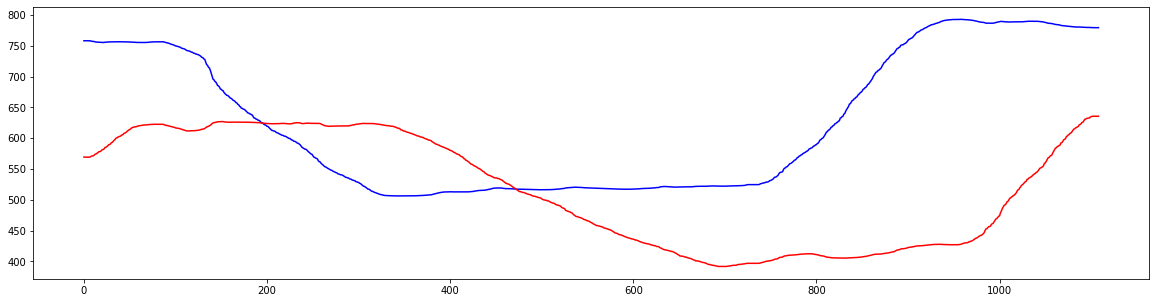

In [80]:
fig=plt.figure(figsize=(20,5))

plt.plot(data.X,c='b')
#.set_title("X",fontdict={'fontsize': 20})

plt.plot(data.Y,c='r',)
#plt.set_title("Y",fontdict={'fontsize': 20})

plt.show()

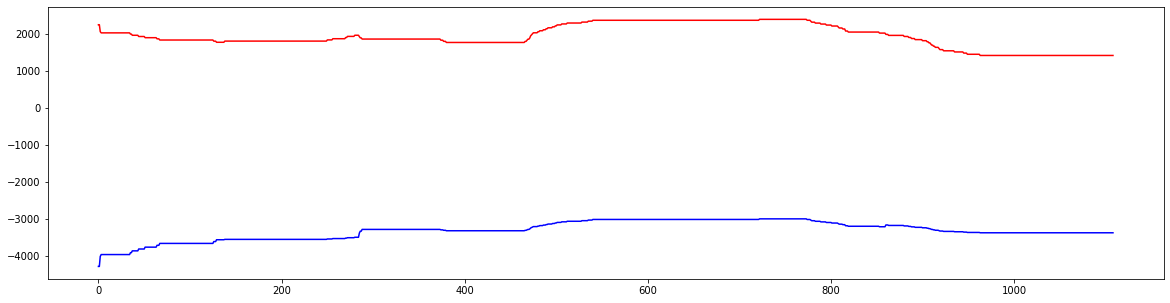

In [81]:
fig=plt.figure(figsize=(20,5))
plt.plot(data.TiltX,c='b')
#plt.set_title("Tilt X",fontdict={'fontsize': 20})

plt.plot(data.TiltY,c='r')
#ax6.set_title("Tilt Y",fontdict={'fontsize': 20})

plt.show()